In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

epoch = 4
lr = 0.01
batch_size_train = 64
batch_size_test = 1000

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/Downloads', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/Downloads', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()])),
  batch_size=batch_size_test, shuffle=True)

In [2]:
def show_tensor_images(image_tensor, num_images=8, size=(1, 28, 28)):    
    image_unflat = image_tensor.detach().cpu().view(-1, *size)    
    image_grid = make_grid(image_unflat[:num_images], nrow=8)    
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())    
    plt.show()

In [28]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 3, 3)
        self.conv2 = nn.Conv2d(3, 5, 2)
        self.pooling = nn.MaxPool2d(2, 1)
        self.fc1 = nn.Linear(24 * 24 * 5, 784 * 2)
        self.fc2 = nn.Linear(784 * 2, 1000)
        self.fc3 = nn.Linear(1000, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.pooling(x)
        x = F.leaky_relu(x)
        x = x.view(-1, 24 * 24 * 5)
        x = self.fc1(x)
        torch.nn.Dropout()
        x = F.leaky_relu(x)
        x = self.fc2(x)
        torch.nn.Dropout()
        x = F.leaky_relu(x)
        torch.nn.Dropout()
        x = self.fc3(x)
        torch.nn.Dropout()
        return F.log_softmax(x, dim = 1)

def train(epoch, net):
    count = 0
    for i in range(epoch):
        optimizer = torch.optim.Adam(net.parameters())
        loss = nn.CrossEntropyLoss()
        for image, target in train_loader:
            prediction = net.forward(image).cuda()
            optimizer.zero_grad()
            l = loss(prediction, target.cuda())
            l.backward()
            optimizer.step()
            count += 1
            plt.plot(count, l.item(), 'ro')
            
def to_number(tensor):
    t = tensor.tolist()
    for i in range(len(t)):
        t[i] = t[i].index(max(t[i]))
    return t

def count_correctness(prediction, ground_truth):
    eq = len([prediction[i] for i in range(len(prediction)) if prediction[i] == ground_truth[i]])
    return eq / len(prediction) * 100

def test(net):
    optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)
    loss = nn.CrossEntropyLoss()
    for image, target in test_loader:
        prediction = net.forward(image)
        show_tensor_images(image)
        print("Prediction: " + str(to_number(prediction[:8])).rstrip("]") + "...")
        print("Ground Truth: " + str(target.tolist()[:8]).rstrip("]") + "...")
        print("Percentage Correct: " + str(count_correctness(to_number(prediction), target.tolist())))
        l = loss(prediction, target)


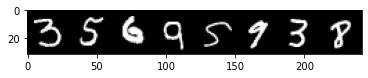

Prediction: [1, 1, 1, 1, 1, 1, 1, 1...
Ground Truth: [3, 5, 6, 9, 5, 9, 3, 8...
Percentage Correct: 12.0


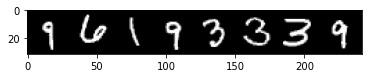

Prediction: [1, 1, 1, 1, 1, 1, 1, 1...
Ground Truth: [9, 6, 1, 9, 3, 3, 3, 9...
Percentage Correct: 9.9


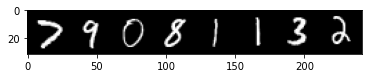

Prediction: [1, 1, 1, 1, 1, 1, 1, 1...
Ground Truth: [7, 9, 0, 8, 1, 1, 3, 2...
Percentage Correct: 12.2


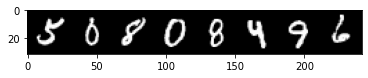

Prediction: [1, 1, 1, 1, 1, 1, 1, 1...
Ground Truth: [5, 0, 8, 0, 8, 4, 9, 6...
Percentage Correct: 12.0


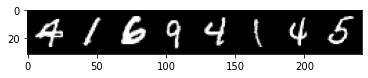

Prediction: [1, 1, 1, 1, 1, 1, 1, 1...
Ground Truth: [4, 1, 6, 9, 4, 1, 4, 5...
Percentage Correct: 10.8


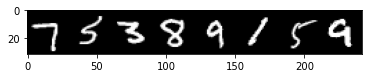

Prediction: [1, 1, 1, 1, 1, 1, 1, 1...
Ground Truth: [7, 5, 3, 8, 9, 1, 5, 9...
Percentage Correct: 10.4


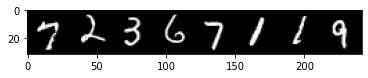

Prediction: [1, 1, 1, 1, 1, 1, 1, 1...
Ground Truth: [7, 2, 3, 6, 7, 1, 1, 9...
Percentage Correct: 10.0


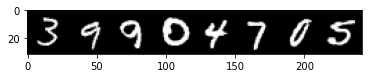

Prediction: [1, 1, 1, 1, 1, 1, 1, 1...
Ground Truth: [3, 9, 9, 0, 4, 7, 0, 5...
Percentage Correct: 12.1


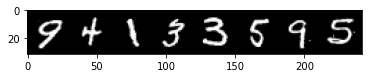

Prediction: [1, 1, 1, 1, 1, 1, 1, 1...
Ground Truth: [9, 4, 1, 3, 3, 5, 9, 5...
Percentage Correct: 10.8


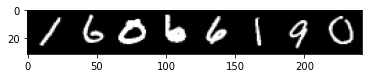

Prediction: [1, 1, 1, 1, 1, 1, 1, 1...
Ground Truth: [1, 6, 0, 6, 6, 1, 9, 0...
Percentage Correct: 13.4


In [24]:
net = Net()
test(net)

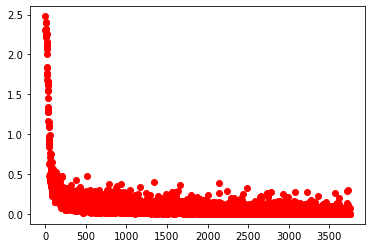

In [26]:
train(4, net)

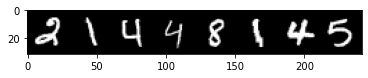

Prediction: [2, 1, 4, 4, 8, 1, 4, 5...
Ground Truth: [2, 1, 4, 4, 8, 1, 4, 5...
Percentage Correct: 98.6


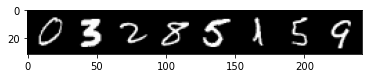

Prediction: [0, 3, 2, 8, 5, 1, 5, 9...
Ground Truth: [0, 3, 2, 8, 5, 1, 5, 9...
Percentage Correct: 98.0


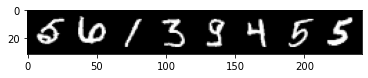

Prediction: [5, 6, 1, 3, 8, 4, 5, 5...
Ground Truth: [5, 6, 1, 3, 9, 4, 5, 5...
Percentage Correct: 98.6


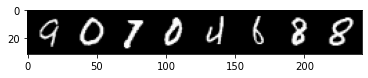

Prediction: [9, 0, 7, 0, 4, 6, 8, 8...
Ground Truth: [9, 0, 7, 0, 4, 6, 8, 8...
Percentage Correct: 97.39999999999999


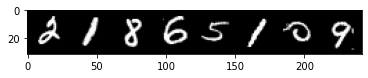

Prediction: [2, 1, 8, 6, 5, 1, 0, 9...
Ground Truth: [2, 1, 8, 6, 5, 1, 0, 9...
Percentage Correct: 97.8


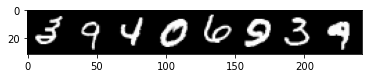

Prediction: [3, 9, 4, 0, 6, 9, 3, 9...
Ground Truth: [3, 9, 4, 0, 6, 9, 3, 9...
Percentage Correct: 98.9


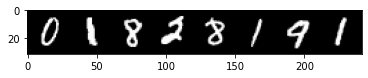

Prediction: [0, 1, 8, 2, 8, 1, 9, 1...
Ground Truth: [0, 1, 8, 2, 8, 1, 9, 1...
Percentage Correct: 98.5


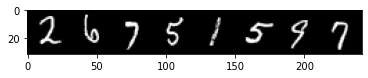

Prediction: [2, 6, 7, 5, 1, 5, 9, 7...
Ground Truth: [2, 6, 7, 5, 1, 5, 9, 7...
Percentage Correct: 98.5


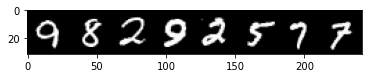

Prediction: [9, 8, 2, 9, 2, 5, 7, 7...
Ground Truth: [9, 8, 2, 9, 2, 5, 7, 7...
Percentage Correct: 99.1


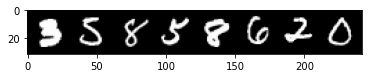

Prediction: [3, 5, 8, 5, 8, 6, 2, 0...
Ground Truth: [3, 5, 8, 5, 8, 6, 2, 0...
Percentage Correct: 98.4


In [27]:
test(net)